# Library

In [30]:
import pandas as pd
import random
import os
import gc
import numpy as np

# 시각화 라이브러리
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

#
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import mean_squared_error

# 
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, Concatenate, Lambda, GaussianNoise, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers.experimental.preprocessing import Normalization
import tensorflow as tf
import keras.backend as K
import tensorflow_addons as tfa

# sampling library
import smogn
import imblearn

# Set Seed

In [2]:
DEFAULT_RANDOM_SEED = 42

def seedBasic(seed=DEFAULT_RANDOM_SEED):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    
# tensorflow random seed 
import tensorflow as tf 
def seedTF(seed=DEFAULT_RANDOM_SEED):
    tf.random.set_seed(seed)
    
# torch random seed
import torch
def seedTorch(seed=DEFAULT_RANDOM_SEED):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
      
# basic + tensorflow + torch 
def seedEverything(seed=DEFAULT_RANDOM_SEED):
    seedBasic(seed)
    seedTF(seed)
    seedTorch(seed)

seedEverything(DEFAULT_RANDOM_SEED)

# Data Load

In [3]:
# Import train and test CSV files
train_df = pd.read_csv('../dataset/train.csv')
test_df = pd.read_csv("../dataset/test.csv")

In [4]:
# Train
train_x = train_df.filter(regex='X') # Input : X Featrue
train_y = train_df.filter(regex='Y') # Output : Y Feature
# Test
test_x = test_df.filter(regex='X') 
test_y = test_df.filter(regex='Y') 

In [5]:
## Meta data
data_x_info = pd.read_csv('../dataset/meta/x_feature_info.csv')
data_y_info = pd.read_csv('../dataset/meta/y_feature_info.csv')
data_y_spec_info = pd.read_csv('../dataset/meta/y_feature_spec_info.csv')

# Table of Content
1. 각 Y variable 마다 가장 분포를 잘 표현할 수 있는 모델들을 Ensemble
2. 

In [15]:
train_Y.describe().iloc[4, :]
train_Y.describe().iloc[6, :]

Y_01     1.57600
Y_02     1.29900
Y_03     1.23800
Y_04    15.62075
Y_05    33.18700
Y_06    17.16200
Y_07     3.43600
Y_08   -25.85700
Y_09   -25.87400
Y_10   -21.79400
Y_11    24.91000
Y_12   -25.79900
Y_13   -25.79500
Y_14   -25.80800
Name: 75%, dtype: float64

In [21]:
## load data
housing = pd.read_csv(

    ## http://jse.amstat.org/v19n3/decock.pdf
    'https://raw.githubusercontent.com/nickkunz/smogn/master/data/housing.csv'
)

In [23]:
housing_smogn = smogn.smoter(
    
    data = housing,  ## pandas dataframe
    y = 'SalePrice'  ## string ('header name')
)

r_index: 100%|##########| 84/84 [00:01<00:00, 77.70it/s]


In [54]:
housing_smogn

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,546,34,FV,9567,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,4,2009,WD,Normal,259791
1,1038,60,FV,10462,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2009,WD,Normal,257382
2,210,59,FV,8955,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,1,0,0,1,0,6,2008,WD,Normal,253192
3,207,59,FV,9115,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,1,0,0,0,0,7,2008,WD,Normal,255013
4,689,49,RL,9784,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2008,WD,Normal,265852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,1450,180,RM,1533,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2006,WD,Abnorml,92000
1451,1452,20,RL,9262,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2009,New,Partial,287090
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000


In [66]:
# Fold 0
train_Y_smogns = []
for col_name in train_Y.columns:
    train_Y_smogn = smogn.smoter(data=pd.DataFrame(train_Y.loc[:, col_name].reset_index(drop=False)), y=col_name)
    train_Y_smogns.append(train_Y_smogn)
    break

r_index: 100%|##########| 1420/1420 [00:01<00:00, 1389.91it/s]


In [129]:
train_Y_smogn.to_csv('fold0-train_Y_01_smogns.csv')

In [126]:
def one_nrmse(gt, preds):
    rmse = rmse = tf.reduce_mean(tf.square((gt - preds)))
    nrmse = rmse/tf.reduce_mean(tf.abs(gt))
    return nrmse

def fold_nrmse(all_nrmse):
    score = 1.2 * np.sum(all_nrmse[:8]) + 1.0 * np.sum(all_nrmse[8:14])
    return score

# fit
def create_mlp(
    num_columns, num_targets, hidden_units, dropout_rates, learning_rate, wd
):

    inp = tf.keras.layers.Input(shape=(num_columns,))
    x = tf.keras.layers.BatchNormalization()(inp)
    x = tf.keras.layers.Dropout(dropout_rates[0])(x)
    for i in range(len(hidden_units)):
        x = tf.keras.layers.Dense(hidden_units[i])(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.Activation('relu')(x) # swish
        x = tf.keras.layers.Dropout(dropout_rates[i + 1])(x)

    out = tf.keras.layers.Dense(num_targets)(x)

    model = tf.keras.models.Model(inputs=inp, outputs=out)
    model.compile(
        # optimizer=tfa.optimizers.AdamW(learning_rate=learning_rate, weight_decay=wd),
        optimizer=tf.optimizers.Adam(learning_rate=learning_rate), # more stable than AdamW
        loss='mse',
        # metrics='mse',
        metrics=[one_nrmse],
    )

    return model

In [101]:
from tqdm import tqdm

DEFAULT_RANDOM_SEED=42
X, Y = train_x.copy(), train_y.copy()

fld = KFold(n_splits=5, shuffle=True, random_state=DEFAULT_RANDOM_SEED)
for fold, (tr, te) in enumerate(fld.split(X, Y)):
    train_X, valid_X = X.loc[tr], X.loc[te]
    train_Y, valid_Y = Y.loc[tr], Y.loc[te]
    break

t_x = pd.DataFrame()
t_y = pd.DataFrame()
for idx in tqdm(train_Y_smogn['index']):
    t_x = pd.concat([t_x, train_X[train_X.index == idx]])
    t_y = pd.concat([t_y, train_Y[train_Y.index == idx]])

100%|██████████| 36267/36267 [01:12<00:00, 501.18it/s]


In [102]:
for i in range(14):
    tmp_train_Y, tmp_valid_Y = t_y.iloc[:, i], valid_Y.iloc[:, i]
    break

In [125]:
tmp_valid_Y.shape

(7922,)

In [127]:
epochs = 200
batch_size = 2048
hidden_units = [160, 80, 40]
dropout_rates = [0.00, 0.00, 0.00, 0.00]
learning_rate = 1e-3
wd = 1e-2

es = EarlyStopping(monitor = 'val_one_nrmse', min_delta = 1e-4, patience = 50, mode = 'min', 
                            baseline = None, restore_best_weights = True, verbose = True)

# model
clf = create_mlp(
    train_X.shape[1], 1, hidden_units, dropout_rates, learning_rate, wd
)
# result
result = clf.fit(t_x, tmp_train_Y, 
                validation_data = (valid_X, tmp_valid_Y),
                epochs = epochs, 
                batch_size = batch_size, 
                callbacks = [es], 
                verbose=True)

hist = pd.DataFrame(result.history)
score = hist['val_one_nrmse'].min()

valid_preds = {}
valid_pred = clf.predict(valid_X)
valid_preds['Y_01'] = valid_pred.squeeze()

preds = pd.DataFrame(valid_preds)
preds

Epoch 1/200


2022-08-24 05:27:50.591709: E tensorflow/stream_executor/cuda/cuda_blas.cc:232] failed to create cublas handle: CUBLAS_STATUS_NOT_INITIALIZED
2022-08-24 05:27:50.591767: E tensorflow/stream_executor/cuda/cuda_blas.cc:234] Failure to initialize cublas may be due to OOM (cublas needs some free memory when you initialize it, and your deep-learning framework may have preallocated more than its fair share), or may be because this binary was not built with support for the GPU in your machine.
2022-08-24 05:27:50.591792: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at matmul_op_impl.h:438 : INTERNAL: Attempting to perform BLAS operation using StreamExecutor without BLAS support


InternalError: Graph execution error:

Detected at node 'model_3/dense_12/MatMul' defined at (most recent call last):
    File "/userHome/lg-sensor/miniconda3/envs/lg-sensor/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/userHome/lg-sensor/miniconda3/envs/lg-sensor/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/userHome/lg-sensor/miniconda3/envs/lg-sensor/lib/python3.8/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/userHome/lg-sensor/miniconda3/envs/lg-sensor/lib/python3.8/site-packages/traitlets/config/application.py", line 976, in launch_instance
      app.start()
    File "/userHome/lg-sensor/miniconda3/envs/lg-sensor/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/userHome/lg-sensor/miniconda3/envs/lg-sensor/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/userHome/lg-sensor/miniconda3/envs/lg-sensor/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/userHome/lg-sensor/miniconda3/envs/lg-sensor/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/userHome/lg-sensor/miniconda3/envs/lg-sensor/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/userHome/lg-sensor/miniconda3/envs/lg-sensor/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/userHome/lg-sensor/miniconda3/envs/lg-sensor/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/userHome/lg-sensor/miniconda3/envs/lg-sensor/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/userHome/lg-sensor/miniconda3/envs/lg-sensor/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/userHome/lg-sensor/miniconda3/envs/lg-sensor/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/userHome/lg-sensor/miniconda3/envs/lg-sensor/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/userHome/lg-sensor/miniconda3/envs/lg-sensor/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "/userHome/lg-sensor/miniconda3/envs/lg-sensor/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "/userHome/lg-sensor/miniconda3/envs/lg-sensor/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/userHome/lg-sensor/miniconda3/envs/lg-sensor/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/userHome/lg-sensor/miniconda3/envs/lg-sensor/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/userHome/lg-sensor/miniconda3/envs/lg-sensor/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_1122632/3443091688.py", line 16, in <cell line: 16>
      result = clf.fit(t_x.reset_index(drop=True), tmp_train_Y.reset_index(drop=True),
    File "/userHome/lg-sensor/miniconda3/envs/lg-sensor/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/userHome/lg-sensor/miniconda3/envs/lg-sensor/lib/python3.8/site-packages/keras/engine/training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "/userHome/lg-sensor/miniconda3/envs/lg-sensor/lib/python3.8/site-packages/keras/engine/training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "/userHome/lg-sensor/miniconda3/envs/lg-sensor/lib/python3.8/site-packages/keras/engine/training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/userHome/lg-sensor/miniconda3/envs/lg-sensor/lib/python3.8/site-packages/keras/engine/training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "/userHome/lg-sensor/miniconda3/envs/lg-sensor/lib/python3.8/site-packages/keras/engine/training.py", line 889, in train_step
      y_pred = self(x, training=True)
    File "/userHome/lg-sensor/miniconda3/envs/lg-sensor/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/userHome/lg-sensor/miniconda3/envs/lg-sensor/lib/python3.8/site-packages/keras/engine/training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "/userHome/lg-sensor/miniconda3/envs/lg-sensor/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/userHome/lg-sensor/miniconda3/envs/lg-sensor/lib/python3.8/site-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/userHome/lg-sensor/miniconda3/envs/lg-sensor/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/userHome/lg-sensor/miniconda3/envs/lg-sensor/lib/python3.8/site-packages/keras/engine/functional.py", line 458, in call
      return self._run_internal_graph(
    File "/userHome/lg-sensor/miniconda3/envs/lg-sensor/lib/python3.8/site-packages/keras/engine/functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/userHome/lg-sensor/miniconda3/envs/lg-sensor/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/userHome/lg-sensor/miniconda3/envs/lg-sensor/lib/python3.8/site-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/userHome/lg-sensor/miniconda3/envs/lg-sensor/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/userHome/lg-sensor/miniconda3/envs/lg-sensor/lib/python3.8/site-packages/keras/layers/core/dense.py", line 221, in call
      outputs = tf.matmul(a=inputs, b=self.kernel)
Node: 'model_3/dense_12/MatMul'
Attempting to perform BLAS operation using StreamExecutor without BLAS support
	 [[{{node model_3/dense_12/MatMul}}]] [Op:__inference_train_function_5722]

In [ ]:
sns.kdeplot(data=preds.iloc[:, 0], shade=True, label='pred')
sns.kdeplot(data=valid_Y.iloc[:, 0], shade=True, label='true')
plt.show()

In [ ]:
DEFAULT_RANDOM_SEED=42
X, Y = train_x.copy(), train_y.copy()

fld = KFold(n_splits=5, shuffle=True, random_state=DEFAULT_RANDOM_SEED)
for fold, (tr, te) in enumerate(fld.split(X, Y)):
    
    train_X, valid_X = X.loc[tr], X.loc[te]
    train_Y, valid_Y = Y.loc[tr], Y.loc[te]

    fig, axes = plt.subplots(nrows=5 ,ncols=3, figsize=(20, 20))

    for i in range(14):
        fig.suptitle(f"Fold-{fold} Train vs Valid Distributions")
        sns.kdeplot(data=train_Y.iloc[:, i], shade=True, label='Train', ax = axes[i//3, i%3])
        sns.kdeplot(data=valid_Y.iloc[:, i], shade=True, label='Valid', ax = axes[i//3, i%3])
        axes[i//3, i%3].legend()
    plt.show()
    break

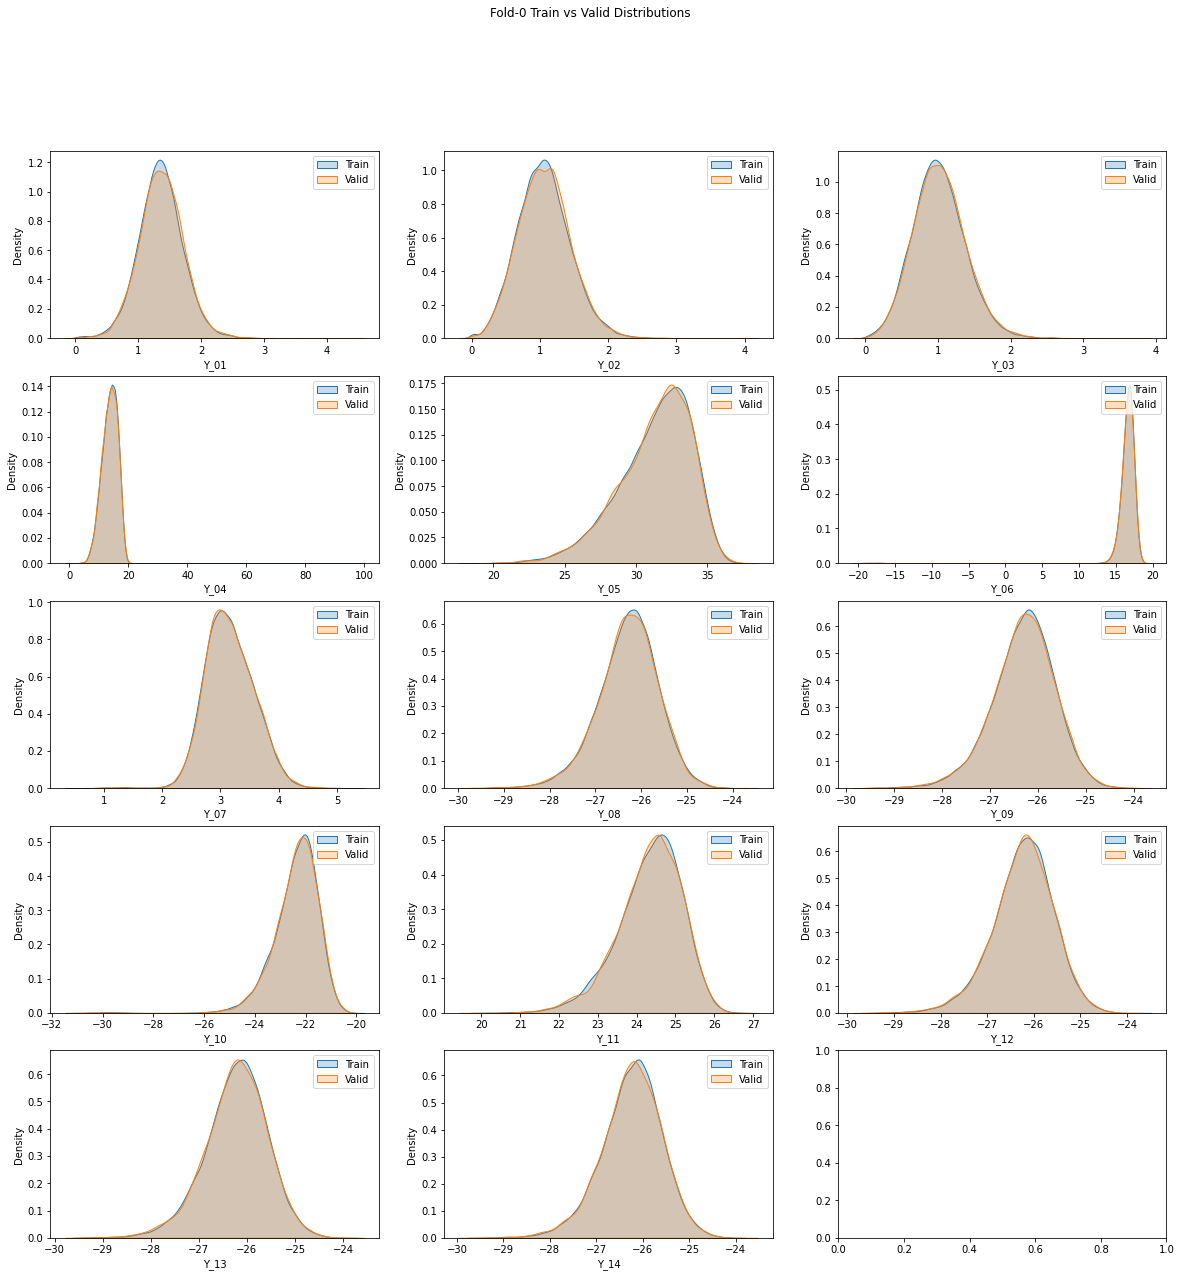

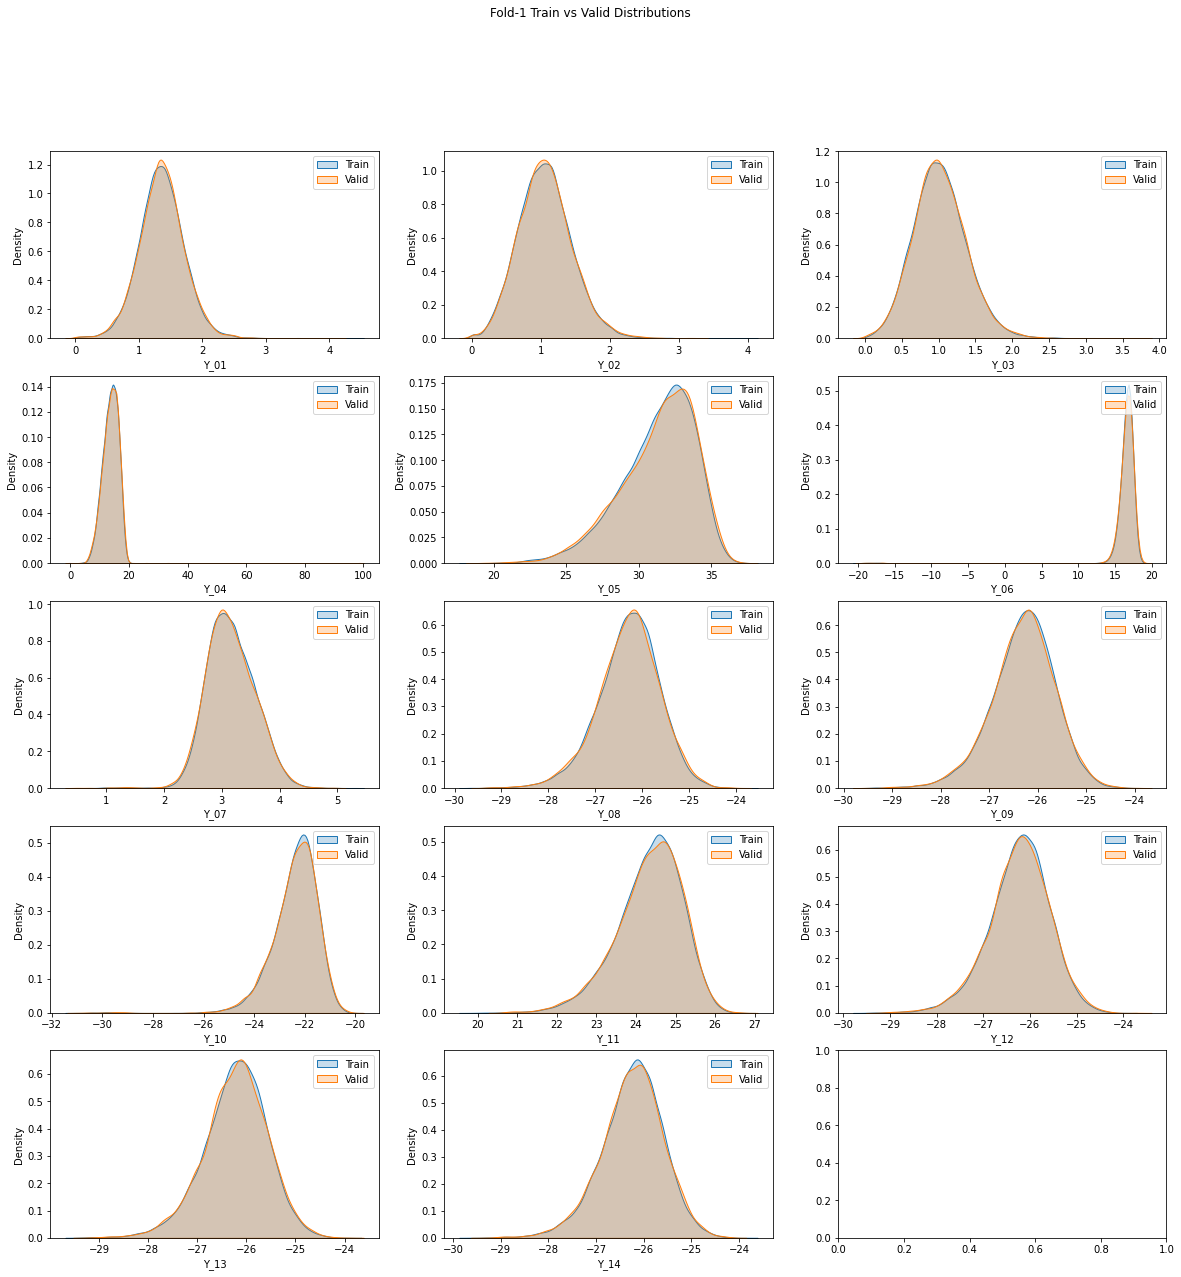

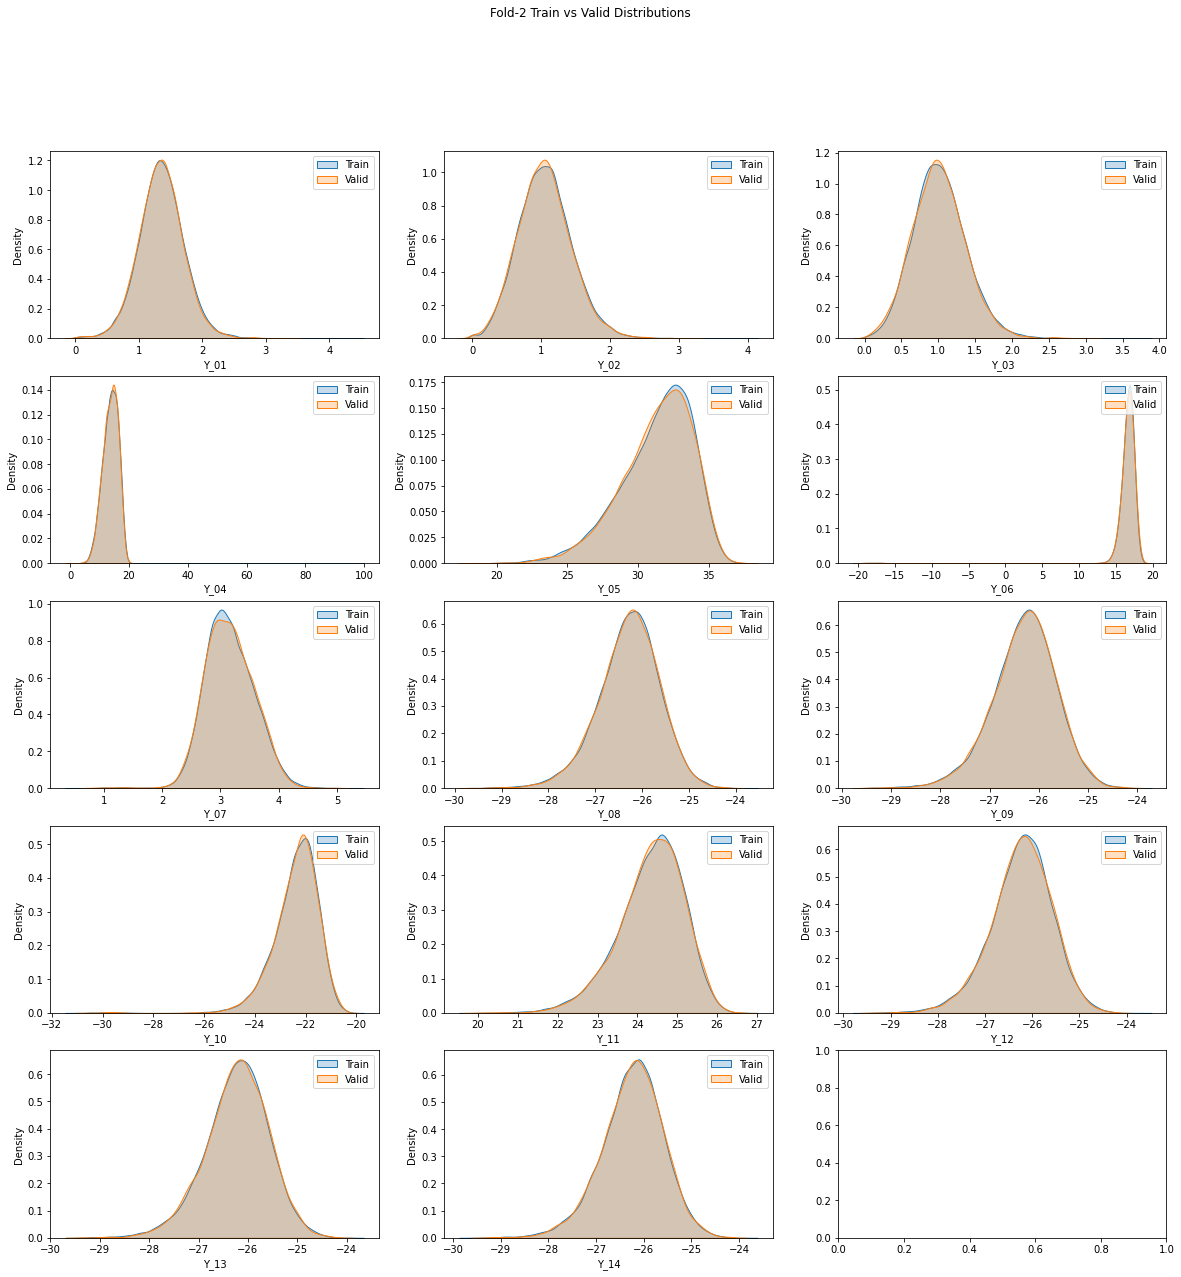

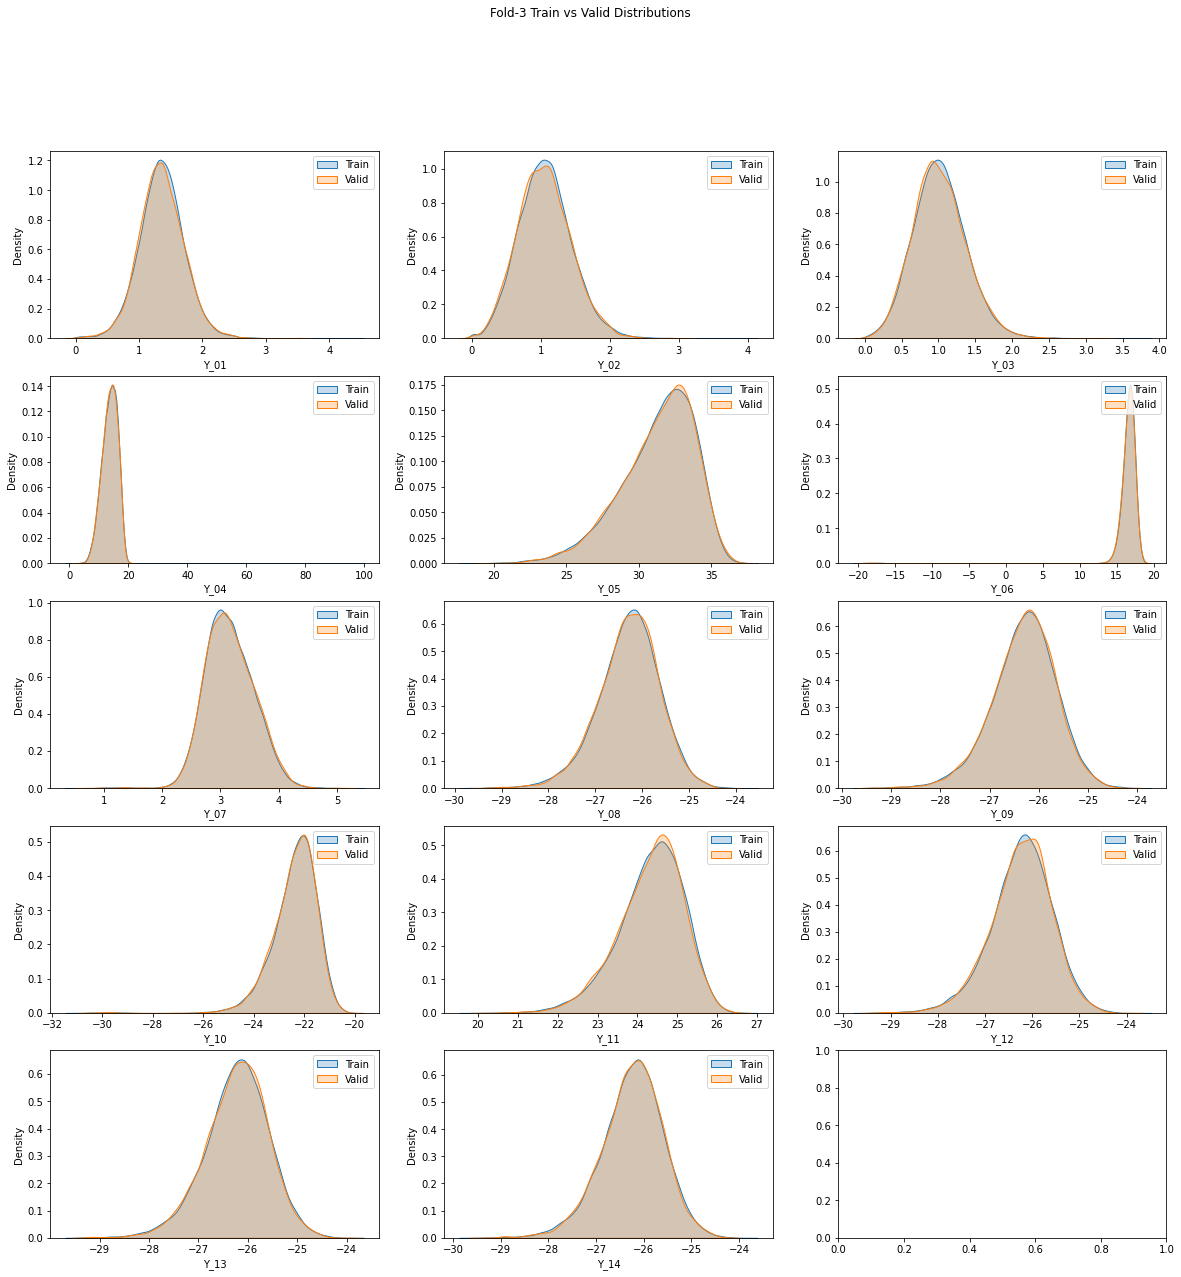

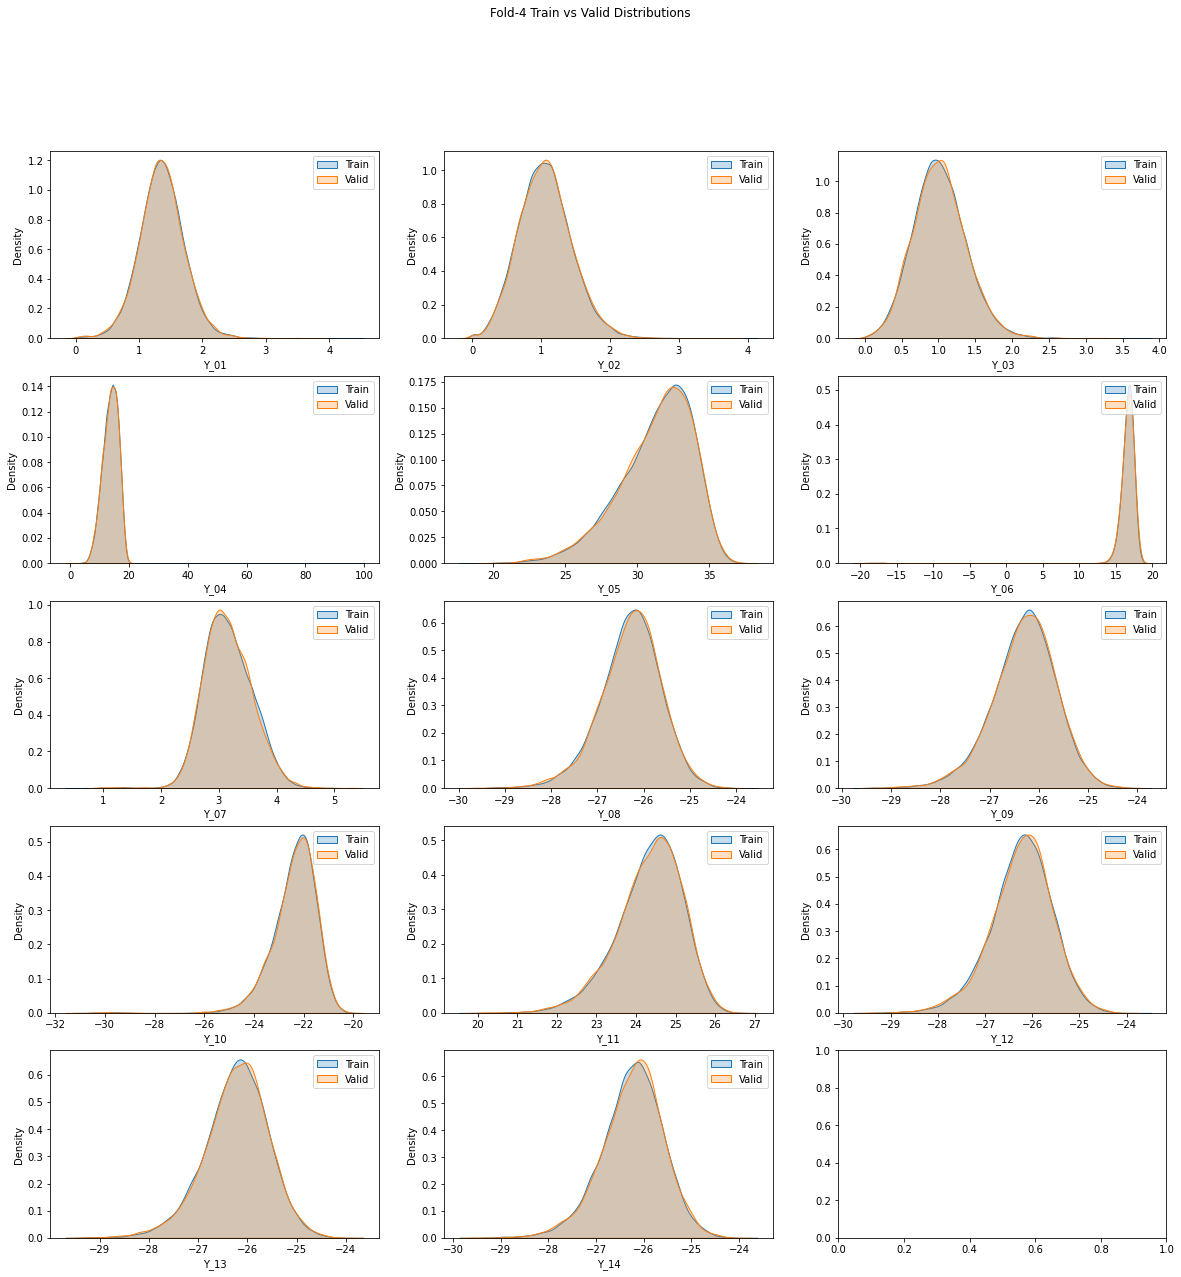

In [9]:
DEFAULT_RANDOM_SEED=42
X, Y = train_x.copy(), train_y.copy()

fld = KFold(n_splits=5, shuffle=True, random_state=DEFAULT_RANDOM_SEED)
for fold, (tr, te) in enumerate(fld.split(X, Y)):
    
    train_X, valid_X = X.loc[tr], X.loc[te]
    train_Y, valid_Y = Y.loc[tr], Y.loc[te]

    fig, axes = plt.subplots(nrows=5 ,ncols=3, figsize=(20, 20))

    for i in range(14):
        fig.suptitle(f"Fold-{fold} Train vs Valid Distributions")
        sns.kdeplot(data=train_Y.iloc[:, i], shade=True, label='Train', ax = axes[i//3, i%3])
        sns.kdeplot(data=valid_Y.iloc[:, i], shade=True, label='Valid', ax = axes[i//3, i%3])
        axes[i//3, i%3].legend()
    plt.show()
    break

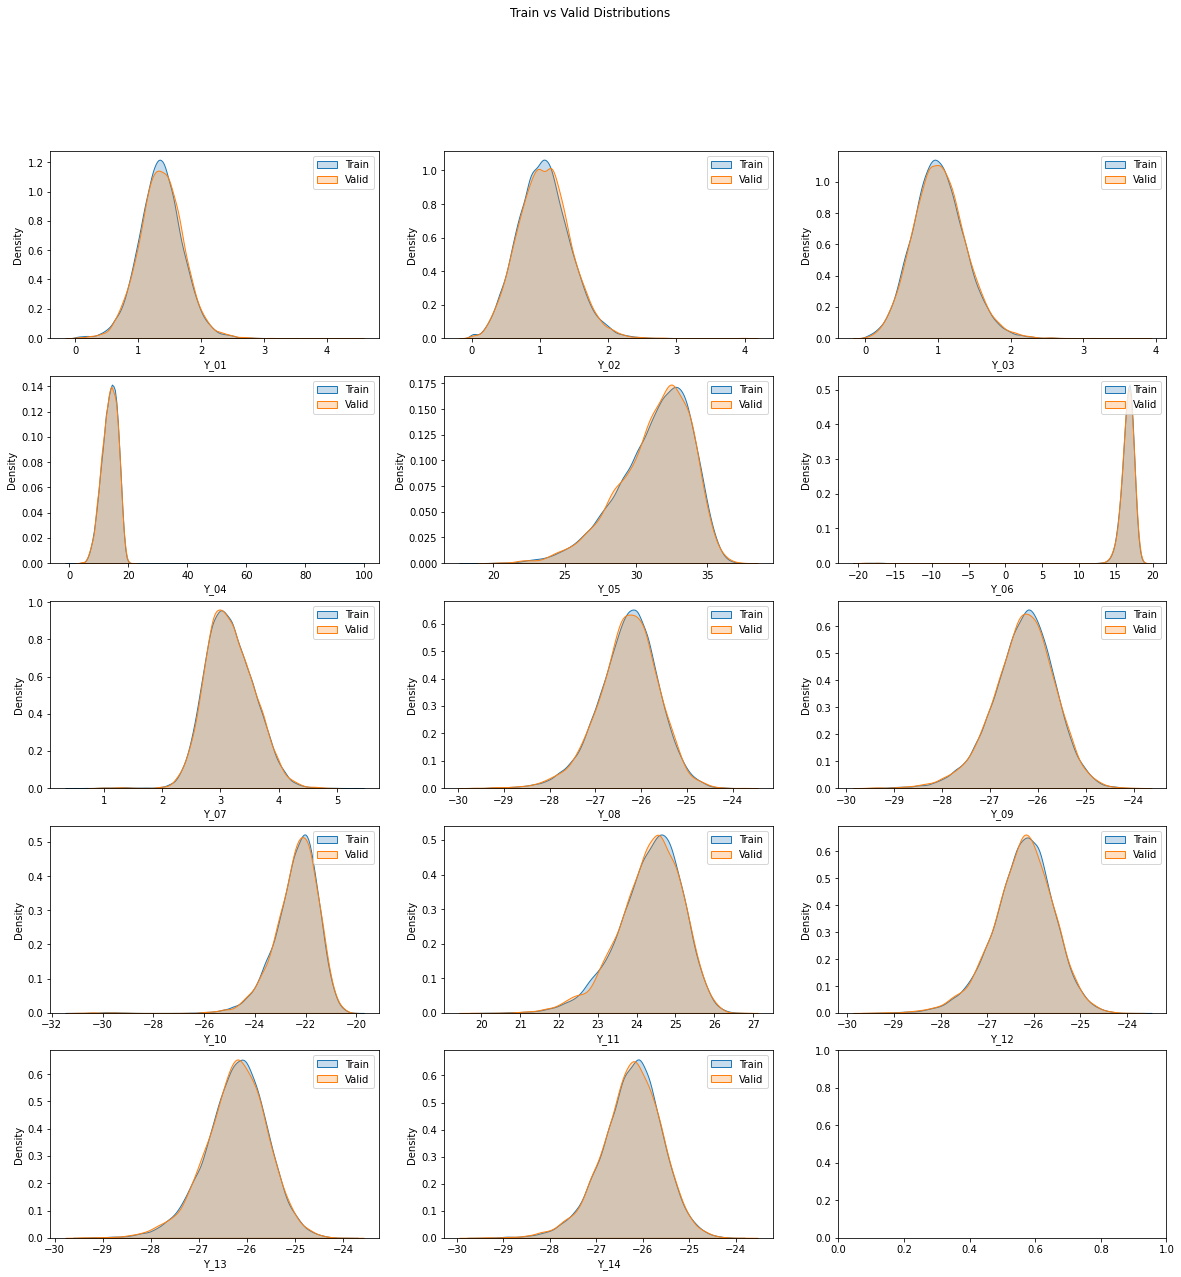

In [8]:
fig, axes = plt.subplots(nrows=5 ,ncols=3, figsize=(20, 20))

for i in range(14):
    fig.suptitle(f"Train vs Valid Distributions")
    sns.kdeplot(data=train_Y.iloc[:, i], shade=True, label='Train', ax = axes[i//3, i%3])
    sns.kdeplot(data=valid_Y.iloc[:, i], shade=True, label='Valid', ax = axes[i//3, i%3])
    axes[i//3, i%3].legend()
plt.show()